In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np
import pandas as pd
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# from tensorflow.keras.layers.normalization import BatchNormalization


# Reading Data

In [ ]:
idg = ImageDataGenerator(rescale = 1./255.) # for transfer models use preprocessing

In [ ]:
BATCH_SIZE = 32
train_iter = idg.flow_from_directory(directory='../input/sports-classification/train', target_size=(224,224),
                                     batch_size=BATCH_SIZE, subset='training')
valid_iter = idg.flow_from_directory(directory='../input/sports-classification/test', target_size=(224,224),
                                     batch_size=BATCH_SIZE, subset='training')

Found 13572 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


# Normal CNN model

In [ ]:
# from tensorflow.keras import regularizers
# model = keras.Sequential ([
#       layers.Conv2D(16, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(l=0.01)),
#       layers.MaxPool2D((2, 2)),
#       layers.Conv2D(64, (3,3), padding='same', kernel_initializer='he_uniform', activation='relu', kernel_regularizer=regularizers.l2(l=0.01)),
#       layers.MaxPool2D((2, 2)),
#       layers.Dropout(0.4),
                
#       layers.Flatten(),
     
# #       layers.Dense(512, kernel_initializer='he_uniform', activation='relu'),
#       layers.Dense(256, kernel_initializer='he_uniform', activation='relu'),
#       layers.Dropout(0.5),
#       layers.Dense(21, kernel_initializer='he_uniform', activation='softmax')              
# ])

In [ ]:
# model.summary()

In [ ]:
# #callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=3)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
#                               patience=1, min_lr=0.001)


In [ ]:
# adam = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
#                               validation_data = valid_iter, 
#                               validation_steps = valid_iter.samples // BATCH_SIZE,
#                               epochs=15, use_multiprocessing=True, workers=4, callbacks=[reduce_lr, early_stopping])

# Xception model application

In [ ]:
xception_model = keras.applications.Xception(include_top=False, input_shape=(224, 224, 3), pooling='avg')

2022-05-21 17:24:19.655544: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 17:24:19.786591: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 17:24:19.787318: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-21 17:24:19.788629: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

83697664/83683744 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential([xception_model, 
                          
                          # layers.Dense(1024, kernel_initializer='he_uniform', activation='softmax'),
                          
                          layers.Dense(256, kernel_initializer='he_uniform', activation='relu'),
#                           layers.Dropout(0.5),

                        
                          layers.Dense(100, kernel_initializer='he_uniform', activation='softmax') 
                          ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25700     
Total params: 21,411,724
Trainable params: 21,357,196
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
for layer in xception_model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 2048)              20861480  
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25700     
Total params: 21,411,724
Trainable params: 550,244
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
#callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=1, min_lr=0.001)


In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=15, use_multiprocessing=True, workers=4, callbacks=[reduce_lr, early_stopping])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-05-21 17:24:25.356616: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-05-21 17:24:29.567215: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


424/424 [==============================] - 61s 121ms/step - loss: 1.7908 - accuracy: 0.5436 - val_loss: 0.9027 - val_accuracy: 0.7125
Epoch 2/15
424/424 [==============================] - 43s 100ms/step - loss: 1.0081 - accuracy: 0.7182 - val_loss: 0.9170 - val_accuracy: 0.7292
Epoch 3/15
424/424 [==============================] - 47s 110ms/step - loss: 0.4665 - accuracy: 0.8583 - val_loss: 0.4796 - val_accuracy: 0.8583
Epoch 4/15
424/424 [==============================] - 49s 115ms/step - loss: 0.3157 - accuracy: 0.8999 - val_loss: 0.4687 - val_accuracy: 0.8604
Epoch 5/15
424/424 [==============================] - 47s 108ms/step - loss: 0.2453 - accuracy: 0.9177 - val_loss: 0.4638 - val_accuracy: 0.8813
Epoch 6/15
424/424 [==============================] - 49s 114ms/step - loss: 0.1846 - accuracy: 0.9404 - val_loss: 0.4944 - val_accuracy: 0.8500
Epoch 7/15
424/424 [==============================] - 47s 108ms/step - loss: 0.0989 - accuracy: 0.9720 - val_loss: 0.4303 - val_accuracy: 0.8

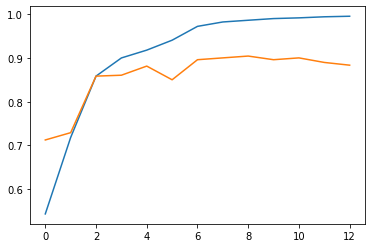

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right)
plt.show()

**Fine Tuning**

In [ ]:
adam = keras.optimizers.Adam(learning_rate=0.00008)
for layer in xception_model.layers:
  layer.trainable = True

In [ ]:
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=4, use_multiprocessing=True, workers=4)#, callbacks=[reduce_lr, early_stopping])

Epoch 1/4
424/424 [==============================] - 172s 393ms/step - loss: 0.5603 - accuracy: 0.8396 - val_loss: 0.2838 - val_accuracy: 0.9104
Epoch 2/4
424/424 [==============================] - 168s 393ms/step - loss: 0.1261 - accuracy: 0.9597 - val_loss: 0.2641 - val_accuracy: 0.9396
Epoch 3/4
424/424 [==============================] - 166s 391ms/step - loss: 0.0728 - accuracy: 0.9781 - val_loss: 0.2033 - val_accuracy: 0.9375
Epoch 4/4
424/424 [==============================] - 166s 390ms/step - loss: 0.0486 - accuracy: 0.9860 - val_loss: 0.2750 - val_accuracy: 0.9375


# VGG model application

In [ ]:
vgg_model = keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3), pooling='avg')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
model = keras.Sequential([vgg_model, 
                          
                          # layers.Dense(1024, kernel_initializer='he_uniform', activation='softmax'),
#                           layers.Dense(512, kernel_initializer='he_uniform', activation='relu'),
                          layers.Flatten(),
                          layers.Dense(256, kernel_initializer='he_uniform', activation='relu'),
#                           layers.Dropout(0.5),

                        
                          layers.Dense(100, kernel_initializer='he_uniform', activation='softmax') 
                          ])
for layer in vgg_model.layers:
  layer.trainable = False

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
Total params: 14,871,716
Trainable params: 157,028
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=1, min_lr=0.0005)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=15, use_multiprocessing=True, workers=4, callbacks=[reduce_lr, early_stopping])

Epoch 1/15
424/424 [==============================] - 48s 104ms/step - loss: 3.5368 - accuracy: 0.1455 - val_loss: 2.6913 - val_accuracy: 0.2875
Epoch 2/15
424/424 [==============================] - 48s 111ms/step - loss: 2.6159 - accuracy: 0.2911 - val_loss: 2.2652 - val_accuracy: 0.3604
Epoch 3/15
424/424 [==============================] - 49s 113ms/step - loss: 2.4150 - accuracy: 0.3354 - val_loss: 2.1767 - val_accuracy: 0.3667
Epoch 4/15
424/424 [==============================] - 45s 106ms/step - loss: 2.3102 - accuracy: 0.3560 - val_loss: 2.0862 - val_accuracy: 0.3833
Epoch 5/15
424/424 [==============================] - 49s 113ms/step - loss: 2.2485 - accuracy: 0.3713 - val_loss: 2.0012 - val_accuracy: 0.4271
Epoch 6/15
424/424 [==============================] - 46s 107ms/step - loss: 2.1837 - accuracy: 0.3874 - val_loss: 2.0460 - val_accuracy: 0.4000
Epoch 7/15
424/424 [==============================] - 50s 117ms/step - loss: 2.0136 - accuracy: 0.4372 - val_loss: 1.8630 - val_ac

**Fine Tuning**

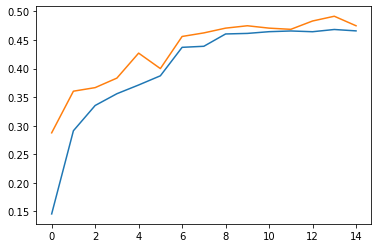

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')

# plt.ylim([0.5, 1])
# plt.legend(loc='lower right)
plt.show()

In [ ]:
for layer in vgg_model.layers:
  layer.trainable = True

adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=4, use_multiprocessing=True, workers=4)#, callbacks=[reduce_lr, early_stopping])

Epoch 1/4
424/424 [==============================] - 95s 218ms/step - loss: 3.4161 - accuracy: 0.1817 - val_loss: 2.1105 - val_accuracy: 0.4271
Epoch 2/4
424/424 [==============================] - 94s 219ms/step - loss: 1.9968 - accuracy: 0.4340 - val_loss: 1.6404 - val_accuracy: 0.5250
Epoch 3/4
424/424 [==============================] - 94s 219ms/step - loss: 1.5674 - accuracy: 0.5528 - val_loss: 1.3456 - val_accuracy: 0.5750
Epoch 4/4
424/424 [==============================] - 94s 219ms/step - loss: 1.2528 - accuracy: 0.6391 - val_loss: 1.0942 - val_accuracy: 0.6958


# ResNet50V2 model application

In [ ]:
resnet = tf.keras.applications.ResNet152V2(include_top=False, input_shape=(224, 224, 3), pooling='avg')

234561536/234545216 [==============================] - 2s 0us/step


In [ ]:
model = keras.Sequential([resnet, 
                          
                          # layers.Dense(1024, kernel_initializer='he_uniform', activation='softmax'),
#                           layers.Dense(512, kernel_initializer='he_uniform', activation='relu'),
                          layers.Flatten(),
                          layers.Dense(256, kernel_initializer='he_uniform', activation='relu'),
#                           layers.Dropout(0.5),

                        
                          layers.Dense(100, kernel_initializer='he_uniform', activation='softmax') 
                          ])
for layer in resnet.layers:
  layer.trainable = False

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152v2 (Functional)     (None, 2048)              58331648  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               524544    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               25700     
Total params: 58,881,892
Trainable params: 550,244
Non-trainable params: 58,331,648
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=1, min_lr=0.0005)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=15, use_multiprocessing=True, workers=4, callbacks=[reduce_lr, early_stopping])

Epoch 1/15
424/424 [==============================] - 76s 158ms/step - loss: 2.2125 - accuracy: 0.4667 - val_loss: 1.1665 - val_accuracy: 0.6625
Epoch 2/15
424/424 [==============================] - 68s 158ms/step - loss: 1.4053 - accuracy: 0.6333 - val_loss: 1.2614 - val_accuracy: 0.6687
Epoch 3/15
424/424 [==============================] - 66s 154ms/step - loss: 0.7032 - accuracy: 0.7953 - val_loss: 0.5919 - val_accuracy: 0.8417
Epoch 4/15
424/424 [==============================] - 68s 159ms/step - loss: 0.4618 - accuracy: 0.8532 - val_loss: 0.5214 - val_accuracy: 0.8562
Epoch 5/15
424/424 [==============================] - 68s 158ms/step - loss: 0.3677 - accuracy: 0.8803 - val_loss: 0.5305 - val_accuracy: 0.8583
Epoch 6/15
424/424 [==============================] - 68s 158ms/step - loss: 0.2166 - accuracy: 0.9309 - val_loss: 0.4801 - val_accuracy: 0.8771
Epoch 7/15
424/424 [==============================] - 67s 157ms/step - loss: 0.1782 - accuracy: 0.9466 - val_loss: 0.4799 - val_ac

In [ ]:
for layer in resnet.layers:
  layer.trainable = True

adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=4, use_multiprocessing=True, workers=4)#, callbacks=[reduce_lr, early_stopping])

Epoch 1/4
424/424 [==============================] - 194s 422ms/step - loss: 0.8880 - accuracy: 0.7566 - val_loss: 0.3745 - val_accuracy: 0.8979
Epoch 2/4
424/424 [==============================] - 176s 414ms/step - loss: 0.3491 - accuracy: 0.8988 - val_loss: 0.3945 - val_accuracy: 0.8938
Epoch 3/4
424/424 [==============================] - 177s 415ms/step - loss: 0.2060 - accuracy: 0.9380 - val_loss: 0.3439 - val_accuracy: 0.9000
Epoch 4/4
424/424 [==============================] - 177s 415ms/step - loss: 0.1965 - accuracy: 0.9422 - val_loss: 0.3086 - val_accuracy: 0.9125


# MobileNet

In [ ]:
mobilenet = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(224, 224, 3), pooling='avg')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model = keras.Sequential([mobilenet, 
                          
                          # layers.Dense(1024, kernel_initializer='he_uniform', activation='softmax'),
#                           layers.Dense(512, kernel_initializer='he_uniform', activation='relu'),
                          layers.Flatten(),
                          layers.Dense(256, kernel_initializer='he_uniform', activation='relu'),
#                           layers.Dropout(0.5),

                        
                          layers.Dense(100, kernel_initializer='he_uniform', activation='softmax') 
                          ])
for layer in mobilenet.layers:
  layer.trainable = False

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               327936    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               25700     
Total params: 2,611,620
Trainable params: 353,636
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=1, min_lr=0.0005)
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=15, use_multiprocessing=True, workers=4, callbacks=[reduce_lr, early_stopping])

Epoch 1/15
424/424 [==============================] - 44s 96ms/step - loss: 2.0784 - accuracy: 0.4794 - val_loss: 1.0260 - val_accuracy: 0.6896
Epoch 2/15
424/424 [==============================] - 41s 95ms/step - loss: 1.2701 - accuracy: 0.6495 - val_loss: 0.9648 - val_accuracy: 0.7354
Epoch 3/15
424/424 [==============================] - 39s 92ms/step - loss: 1.1301 - accuracy: 0.6885 - val_loss: 1.0825 - val_accuracy: 0.7125
Epoch 4/15
424/424 [==============================] - 40s 93ms/step - loss: 0.5710 - accuracy: 0.8312 - val_loss: 0.5692 - val_accuracy: 0.8354
Epoch 5/15
424/424 [==============================] - 48s 110ms/step - loss: 0.4048 - accuracy: 0.8755 - val_loss: 0.6409 - val_accuracy: 0.8229
Epoch 6/15
424/424 [==============================] - 40s 93ms/step - loss: 0.2683 - accuracy: 0.9194 - val_loss: 0.5501 - val_accuracy: 0.8396
Epoch 7/15
424/424 [==============================] - 40s 92ms/step - loss: 0.2374 - accuracy: 0.9311 - val_loss: 0.5483 - val_accuracy

In [ ]:
for layer in mobilenet.layers:
  layer.trainable = True

adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss=losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_iter, steps_per_epoch=train_iter.samples // BATCH_SIZE,
                              validation_data = valid_iter, 
                              validation_steps = valid_iter.samples // BATCH_SIZE,
                              epochs=4, use_multiprocessing=True, workers=4)#, callbacks=[reduce_lr, early_stopping])

Epoch 1/4
424/424 [==============================] - 80s 176ms/step - loss: 0.9755 - accuracy: 0.7419 - val_loss: 0.9432 - val_accuracy: 0.7708
Epoch 2/4
424/424 [==============================] - 76s 177ms/step - loss: 0.4265 - accuracy: 0.8725 - val_loss: 0.6665 - val_accuracy: 0.8354
Epoch 3/4
424/424 [==============================] - 75s 175ms/step - loss: 0.2459 - accuracy: 0.9239 - val_loss: 0.5040 - val_accuracy: 0.8667
Epoch 4/4
424/424 [==============================] - 79s 185ms/step - loss: 0.1728 - accuracy: 0.9473 - val_loss: 0.7567 - val_accuracy: 0.8208
